<a href="https://colab.research.google.com/github/neerajgoskula8888/News-Article-Classification/blob/main/src/notebooks/data/News_Article_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
data = {
    "text": [
        "Government passes new healthcare reform bill",
        "Parliament debates national security policies",
        "Election campaigns begin across the country",
        "New tax laws introduced by the finance ministry",

        "Stock markets rally after strong earnings",
        "Company profits rise due to higher sales",
        "Investors focus on quarterly revenue growth",
        "New startup raises funding from venture capitalists",

        "Football team wins the championship final",
        "Star player scores a hat-trick in the match",
        "Basketball league announces new season schedule",
        "Olympic committee reveals event updates",

        "New AI technology disrupts the tech industry",
        "Tech companies invest in cloud infrastructure",
        "New smartphone launched with advanced features",
        "Cybersecurity firms warn of rising cyber attacks"
    ],
    "category": (
        ["Politics"] * 4 +
        ["Business"] * 4 +
        ["Sports"] * 4 +
        ["Technology"] * 4
    )
}

df = pd.DataFrame(data)
df.head()


,text,category
0,Government passes new healthcare reform bill,Politics
1,Parliament debates national security policies,Politics
2,Election campaigns begin across the country,Politics
3,New tax laws introduced by the finance ministry,Politics
4,Stock markets rally after strong earnings,Business


In [9]:
X = df["text"]
y = df["category"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [10]:
# Makes predictions on test data
y_pred = model.predict(X_test_tfidf)

y_pred


array(['Business', 'Business', 'Business', 'Business', 'Technology'],
      dtype='<U10')

In [11]:
vectorizer = TfidfVectorizer(stop_words="english")

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [12]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


MultinomialNB()

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


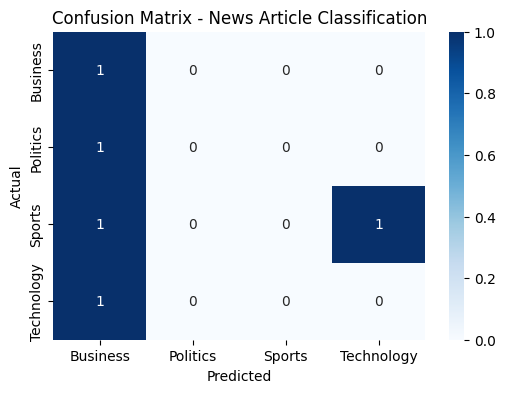

In [13]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=model.classes_,
    yticklabels=model.classes_
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - News Article Classification")
plt.show()


In [14]:
sample_news = [
    "The prime minister met foreign leaders to discuss trade",
    "The new laptop has a faster processor and better battery"
]

sample_vec = vectorizer.transform(sample_news)
predictions = model.predict(sample_vec)

for text, pred in zip(sample_news, predictions):
    print(f"News: {text}")
    print(f"Predicted Category: {pred}\n")


News: The prime minister met foreign leaders to discuss trade
Predicted Category: Business

News: The new laptop has a faster processor and better battery
Predicted Category: Technology



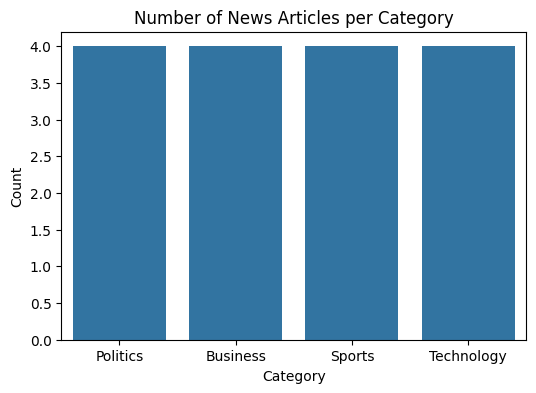

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="category")
plt.title("Number of News Articles per Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


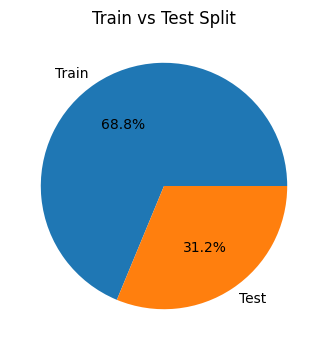

In [16]:
train_size = len(X_train)
test_size = len(X_test)

plt.figure(figsize=(6,4))
plt.pie(
    [train_size, test_size],
    labels=["Train", "Test"],
    autopct="%1.1f%%"
)
plt.title("Train vs Test Split")
plt.show()


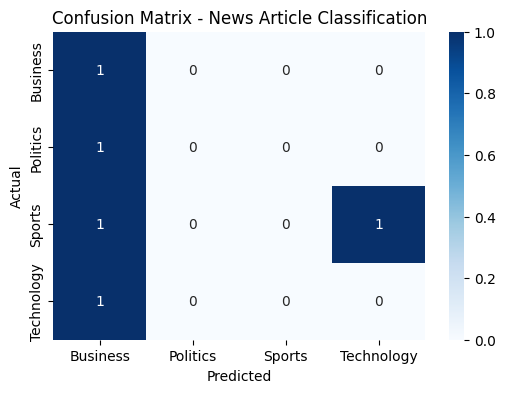

In [18]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=model.classes_,
    yticklabels=model.classes_
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - News Article Classification")

# SAVE IMAGE
plt.savefig("confusion_matrix.png", bbox_inches="tight")
plt.show()


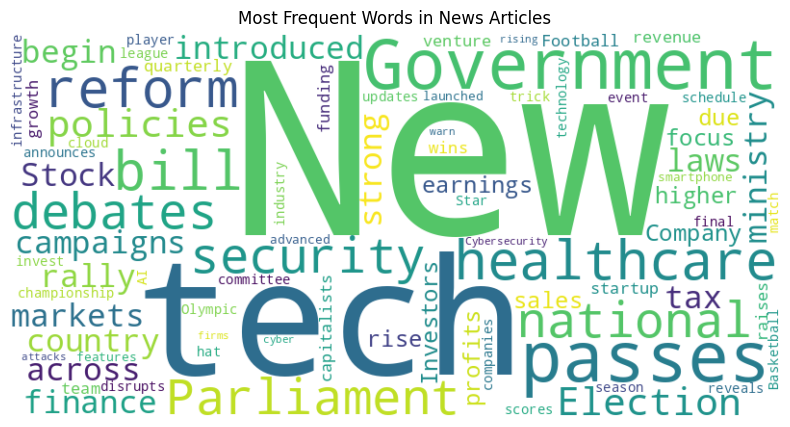

In [19]:
from wordcloud import WordCloud

text_all = " ".join(df["text"])

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white"
).generate(text_all)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in News Articles")
plt.show()


In [22]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

lr_pred = lr_model.predict(X_test_tfidf)

print("Logistic Regression Accuracy:",
      accuracy_score(y_test, lr_pred))


Logistic Regression Accuracy: 0.2
